<font size = 6>
Лабораторная работа "Сравнительный анализ двух выборок"

Выполнил - Карабалин Руслан, ММБ-104-О-02

Цель работы - выполнить сравнительный анализ двух независимых выборок, т.е. проверить гипотезы о полной однородности, равенстве средних и дисперсий генеральных совокупностей по исследуемому показателю, представленных имеющимися выборками. Использовать уровень значимости 0,05.

Выборочные данные представлены в виде объединенной выборки, состоящей из четырех частей, каждая из которых содержит значения исследуемого признака на соответствующей генеральной совокупности. Группирующая переменная, принимающая значения 1, 2, 3, 4, показывает, к какой части относится тот или иной элемент объединенной выборки. Номер выборки и, соответственно, номер генеральной совокупности, определяется значением этой переменной.

# Введение

Подключим библиотеку readxl и импортируем данные в переменную ds0

In [32]:
library(readxl)

ds0 <- read_xlsx("AD.ds3.xlsx")
head(ds0)

v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,⋯,v112,v113,v114,v115,v116,v117,v118,v119,v120,G
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4.093650,9.106130,-18.0265107,2.689088,26.0415089,9.056006,28.067265,22.01410,36.526019,18.529536,⋯,2.008877,-10.9683885,-15.425773,-30.659703,-2.751252,3.666438,25.07425,0.4602339,-34.12734,1
11.853664,-1.287746,-26.2812665,-21.672478,0.9784497,-19.722558,-45.017433,19.22712,34.183479,65.385567,⋯,1.447923,-4.5075314,-5.578855,3.159857,30.422340,34.115070,18.17564,7.3897309,-29.03563,3
7.770431,-6.649831,-18.1381057,-9.144086,-6.8826825,-50.593063,-7.432258,18.87088,32.183995,-15.468149,⋯,17.018063,-6.2490204,-21.093471,-11.894213,30.611333,-9.326853,11.51873,39.6502015,-28.20107,3
10.238958,-2.855306,6.4751856,-28.758874,-13.5894953,36.731543,-66.276622,14.93995,4.869532,6.241263,⋯,7.282104,-7.7614988,-17.341714,-17.380103,11.515355,-9.436993,21.00498,37.2127784,-27.54624,1
10.476734,-7.464716,0.4994871,-1.079881,22.3755631,1.509884,16.760358,27.17550,11.044672,34.019777,⋯,5.934256,-0.4188524,-13.542300,-6.414768,-43.633994,48.206235,10.20883,28.2492306,-25.44640,1
8.060434,6.419596,2.2399416,-15.296829,-7.1321114,36.678201,-25.890487,33.05565,25.684080,24.664169,⋯,5.500893,-2.2440719,-9.973602,-18.503965,-20.252522,-11.240839,36.36294,30.8599124,-22.90782,1


Подключим библиотеку dplyr, при помощи функции select из этого пакета создадим отдельную таблицу на основе столбцов v87 и G

In [33]:
library(dplyr)

ds487 <- select(ds0, contains("v87"), contains("G"))
head(ds487)

v87,G
<dbl>,<dbl>
-10.9683885,1
-4.5075314,3
-6.2490204,3
-7.7614988,1
-0.4188524,1
-2.2440719,1


Переименуем в полученной таблице столбец "v87" на "s87" и столбец "G" на "Factor"

In [34]:
colnames(ds487) <- gsub("v", "s", colnames(ds487))
colnames(ds487) <- gsub("G", "Factor", colnames(ds487))
head(ds487)

s87,Factor
<dbl>,<dbl>
-10.9683885,1
-4.5075314,3
-6.2490204,3
-7.7614988,1
-0.4188524,1
-2.2440719,1


С помощью функции factor преобразуем тип столбца Factor

In [35]:
ds487$Factor <- factor(ds487$Factor)

head(ds487)

s87,Factor
<dbl>,<fct>
-10.9683885,1
-4.5075314,3
-6.2490204,3
-7.7614988,1
-0.4188524,1
-2.2440719,1


Создадим четыре переменные sample871, sample872, sample873, sample874, содержащие первую и четвёртую выборки

In [36]:
sample871 <- subset(ds487, Factor == 1)

head(sample871)

s87,Factor
<dbl>,<fct>
-10.9683885,1
-7.7614988,1
-0.4188524,1
-2.2440719,1
3.0642849,1
-0.6319357,1


In [37]:
sample872 <- subset(ds487, Factor == 2)

head(sample872)

s87,Factor
<dbl>,<fct>
-5.8344159,2
-0.5324142,2
-6.6820650,2
-12.8012704,2
-14.1514039,2
-6.1126644,2


In [38]:
sample873 <- subset(ds487, Factor == 3)

head(sample873)

s87,Factor
<dbl>,<fct>
-4.507531,3
-6.249020,3
-1.128292,3
3.230586,3
-13.162101,3
-12.723725,3


In [39]:
sample874 <- subset(ds487, Factor == 4)

head(sample874)

s87,Factor
<dbl>,<fct>
-3.16125980,4
-12.02444533,4
2.81426435,4
-3.05871761,4
-8.87371441,4
0.09445479,4


Примечание: номер выборки соответсвует номеру признака на соответствующей генеральной совокупности

# Исследование полной однородности

Подключим пакет ggplot2

In [40]:
install.packages("ggplot2")
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Визуализация данных

### Скрипичная диаграмма
Построим скрипичную диаграмму размаха для четырёх выборок

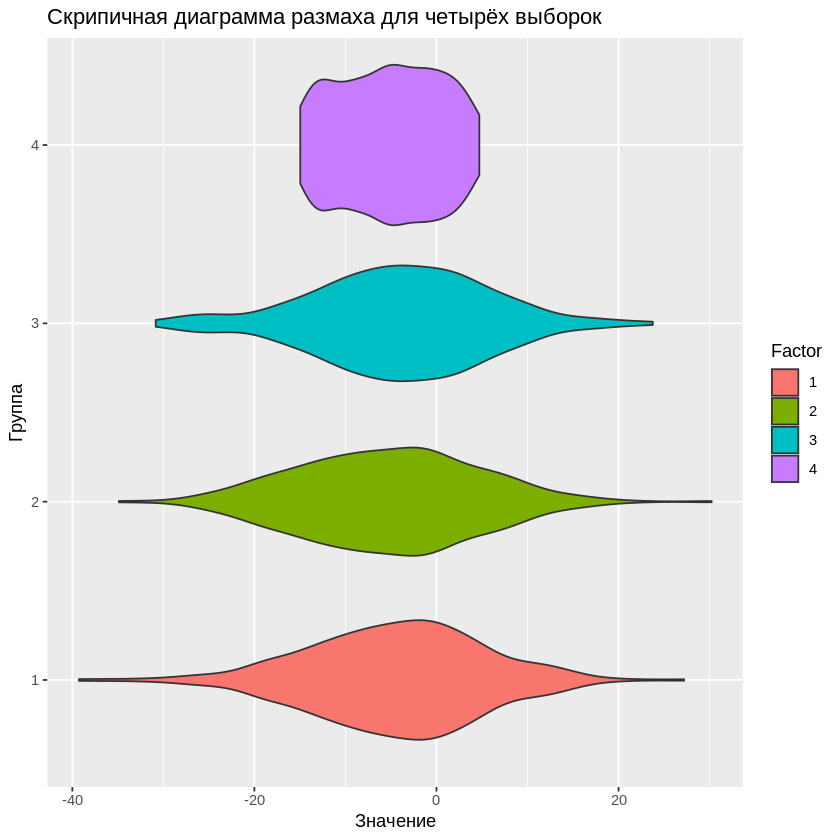

In [41]:
ggplot(ds487, aes(x = s87, y = Factor, fill = Factor)) +
  geom_violin() +
  labs(title = "Скрипичная диаграмма размаха для четырёх выборок", x = "Значение", y = "Группа")

#### Выборки 1 и 2
Генеральные совокупности представленные выборками 1 и 2 имеют схожие распределение, их формы похожи, размах значений примерно одинаковый, плотность данных распределена схожим образом, что может свидетельствовать об их возможной полной однородности.

#### Выборки 1 и 3
Генеральные совокупности представленные выборками 1 и 3 имеют схожие распределение, их формы похожи, размах значений у 3 выборки меньше, плотность данных распределена схожим образом, что может свидетельствовать об их возможной полной однородности.

#### Выборки 1 и 4
Генеральные совокупности представленные выборками 1 и 4 значительно отличаются, 4 выборка имеет более узкий размах, отсутствие хвостов и более плотное сосредоточение данных в центре в отличие от 1 выборки, эти различия говорят о вероятном отсутствии полной однородности между выборками.

#### Выборки 2 и 3
Генеральные совокупности представленные выборками 2 и 3 имеют схожие распределение, их формы похожи, размах значений у 3 выборки меньше, плотность данных распределена схожим образом, что может свидетельствовать об их возможной полной однородности.

#### Выборки 2 и 4
Генеральные совокупности представленные выборками 2 и 4 значительно отличаются, 4 выборка имеет более узкий размах, отсутствие хвостов и более плотное сосредоточение данных в центре в отличие от 2 выборки, эти различия говорят о вероятном отсутствии полной однородности между выборками.

#### Выборки 3 и 4
Генеральные совокупности представленные выборками 3 и 4 значительно отличаются, 4 выборка имеет более узкий размах, отсутствие хвостов и более плотное сосредоточение данных в центре в отличие от 3 выборки, эти различия говорят о вероятном отсутствии полной однородности между выборками.

### Диаграмма эмпирических плотностей
Построим диаграмму эмпирических плотностей для четырёх выборок

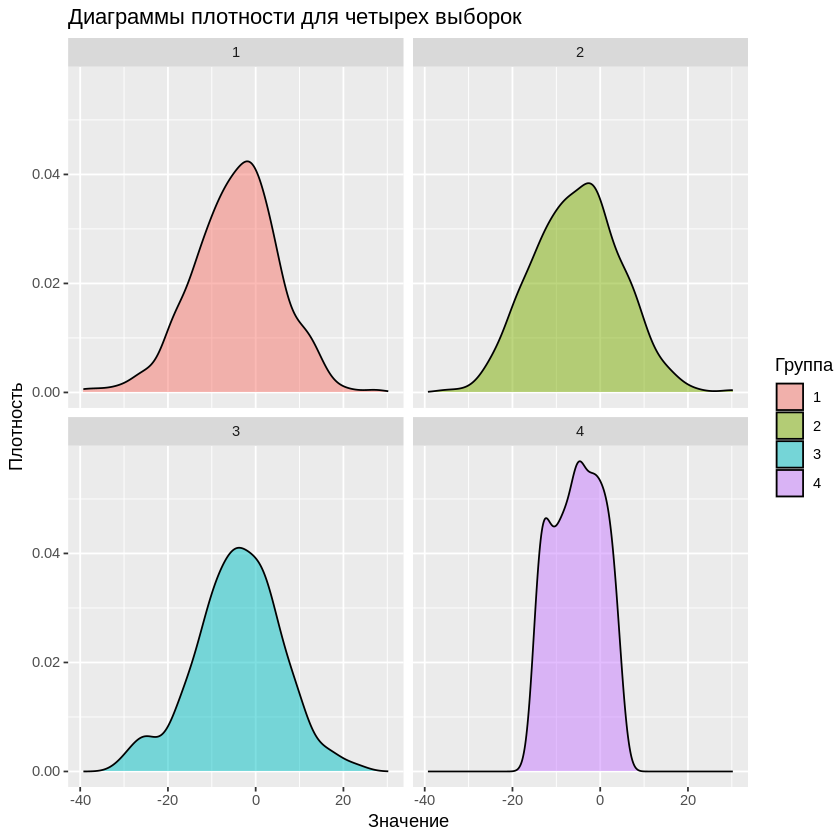

In [42]:
ggplot(ds487, aes(x = s87, fill = as.factor(Factor))) +
  geom_density(alpha = 0.5) +
  facet_wrap(~Factor, ncol = 2) +
  labs(title = "Диаграммы плотности для четырех выборок", x = "Значение", y = "Плотность", fill = "Группа")

#### Выборки 1 и 2
Распределения похожи, они имеют симметричную форму и схожий размах значений.
Различия минимальны, поэтому можно предположить возможную полную однородность.

#### Выборки 1 и 3
В целом распределения похожи, но распределение выборки 3 имеет небольшие асимметрии и дополнительные локальные особенности.
Можно предположить возможную полную однородность.

#### Выборки 1 и 4
Распределения значительно отличаются, выборка 4 имеет более узкий диапазон значений и выраженную асимметрию.
Можно предположить о вероятном отсутствии полной однородности между выборками.

#### Выборки 2 и 3
В целом распределения похожи, но распределение выборки 3 имеет небольшие асимметрии и дополнительные локальные особенности.
Можно предположить возможную полную однородность.

#### Выборки 2 и 4
Распределения значительно отличаются, выборка 4 имеет более узкий диапазон значений и выраженную асимметрию.
Можно предположить о вероятном отсутствии полной однородности между выборками.

#### Выборки 3 и 4
Распределения значительно отличаются, выборка 4 имеет более узкий диапазон значений и выраженную асимметрию.
Можно предположить о вероятном отсутствии полной однородности между выборками.

### Вывод
Генеральные совокупности представленные выборками 1, 2 и 3 имеют схожие распределения, их формы похожи, размах значений примерно одинаковый, а плотность данных распределена схожим образом.
Хотя могут быть небольшие различия, в целом генеральные совокупности представленные выборками 1, 2 и 3 выглядят достаточно схожими, что может свидетельствовать об их полной однородности.

Генеральная совокупность представленные выборкой 4 значительно отличается от остальных: она имеет более узкий размах значений и более плотное сосредоточение данных в центре.
В отличие от генеральных совокупностей представленных выборками 1, 2 и 3, распределение в 4-й группе более концентрированное и не имеет таких длинных хвостов.
Это говорит о том, что генеральная совокупность представленная 4 выборкой, скорее всего, не является однородной с любой из других групп.

## Использование теста

#### Выборки 1 и 2

In [43]:
print(ks.test(sample871$s87, sample872$s87))

Warning message in ks.test.default(sample871$s87, sample872$s87):
“p-value will be approximate in the presence of ties”



	Asymptotic two-sample Kolmogorov-Smirnov test

data:  sample871$s87 and sample872$s87
D = 0.065714, p-value = 0.4365
alternative hypothesis: two-sided



Так как p-значение (p-value) больше уровня значимости 0,05, то не отвергается гипотеза о полной однородности генеральных совокупностей, представленных выборками 1 и 2.

#### Выборки 1 и 3

In [44]:
print(ks.test(sample871$s87, sample873$s87))

Warning message in ks.test.default(sample871$s87, sample873$s87):
“p-value will be approximate in the presence of ties”



	Asymptotic two-sample Kolmogorov-Smirnov test

data:  sample871$s87 and sample873$s87
D = 0.037143, p-value = 0.9692
alternative hypothesis: two-sided



Так как p-значение (p-value) больше уровня значимости 0,05, то не отвергается гипотеза о полной однородности генеральных совокупностей, представленных выборками 1 и 3.

#### Выборки 1 и 4

In [45]:
print(ks.test(sample871$s87, sample874$s87))

Warning message in ks.test.default(sample871$s87, sample874$s87):
“p-value will be approximate in the presence of ties”



	Asymptotic two-sample Kolmogorov-Smirnov test

data:  sample871$s87 and sample874$s87
D = 0.16, p-value = 0.0002569
alternative hypothesis: two-sided



Так как p-значение (p-value) меньше уровня значимости 0,05, то с вероятностью 0,05 отвергается гипотеза о полной однородности генеральных совокупностей, представленных выборками 1 и 4.

#### Выборки 2 и 3

In [46]:
print(ks.test(sample872$s87, sample873$s87))

Warning message in ks.test.default(sample872$s87, sample873$s87):
“p-value will be approximate in the presence of ties”



	Asymptotic two-sample Kolmogorov-Smirnov test

data:  sample872$s87 and sample873$s87
D = 0.082857, p-value = 0.1808
alternative hypothesis: two-sided



Так как p-значение (p-value) больше уровня значимости 0,05, то не отвергается гипотеза о полной однородности генеральных совокупностей, представленных выборками 2 и 3.

#### Выборки 2 и 4

In [47]:
print(ks.test(sample872$s87, sample874$s87))

Warning message in ks.test.default(sample872$s87, sample874$s87):
“p-value will be approximate in the presence of ties”



	Asymptotic two-sample Kolmogorov-Smirnov test

data:  sample872$s87 and sample874$s87
D = 0.16571, p-value = 0.0001339
alternative hypothesis: two-sided



Так как p-значение (p-value) меньше уровня значимости 0,05, то с вероятностью 0,05 отвергается гипотеза о полной однородности генеральных совокупностей, представленных выборками 2 и 4.

#### Выборки 3 и 4

In [48]:
print(ks.test(sample873$s87, sample874$s87))

Warning message in ks.test.default(sample873$s87, sample874$s87):
“p-value will be approximate in the presence of ties”



	Asymptotic two-sample Kolmogorov-Smirnov test

data:  sample873$s87 and sample874$s87
D = 0.17714, p-value = 3.398e-05
alternative hypothesis: two-sided



Так как p-значение (p-value) меньше уровня значимости 0,05, то с вероятностью 0,05 отвергается гипотеза о полной однородности генеральных совокупностейальных совокупностей, представленных выборками 3 и 4.

### Вывод
Исходя из результатов теста Колмогорова-Смирнова, для выборок 1 и 2, 1 и 3, 2 и 3 гипотеза о полной однородности генеральных совокупностей не отвергается, а для выборок 1 и 4, 2 и 4, 3 и 4 гипотеза о полной однородности генеральных совокупностей отвергается.

# Сравнение средних и дисперсий

## Сравнительный анализ выборок 1 и 2

### Тест Уилкоксона

С помощью теста Уилкоксона проверим гипотезу об однородности выборок по средним значениям

In [49]:
wilcox.test(s87~Factor, data=subset(ds487, Factor %in% c(1, 2)))


	Wilcoxon rank sum test with continuity correction

data:  s87 by Factor
W = 64992, p-value = 0.1619
alternative hypothesis: true location shift is not equal to 0


Так как p-значение (p-value) больше уровня значимости 0,05, то не отвергается гипотеза об однородности по средним генеральных совокупностей, представленных исследуемыми выборками.

### Тест Флигнера-Киллина

С помощью теста Флигнера-Киллина проверим гипотезу об однородности выборок по дисперсиям

In [50]:
fligner.test(s87~Factor, data=subset(ds487, Factor %in% c(1, 2)))


	Fligner-Killeen test of homogeneity of variances

data:  s87 by Factor
Fligner-Killeen:med chi-squared = 0.65386, df = 1, p-value = 0.4187


Так как p-значение (p-value) больше уровня значимости 0,05, то не отвергается гипотеза об однородности по дисперсиям генеральных совокупностей, представленных исследуемыми выборками.

Исходя из результатов теста Колмогорова-Смирнова, для выборок 1 и 2 гипотеза о полной однородности генеральных совокупностей не отвергается.

Исходя из результатов тестов Уилкоксона и Флигнера-Киллина, для генеральных совокупностей, представленных выборками 1 и 2 гипотезы об однородности по средним и дисперсиям не отвергается.

## Сравнительный анализ выборок 1 и 3

### Тест Уилкоксона

С помощью теста Уилкоксона проверим гипотезу об однородности выборок по средним значениям

In [51]:
wilcox.test(s87~Factor, data=subset(ds487, Factor %in% c(1, 3)))


	Wilcoxon rank sum test with continuity correction

data:  s87 by Factor
W = 59791, p-value = 0.5856
alternative hypothesis: true location shift is not equal to 0


Так как p-значение (p-value) больше уровня значимости 0,05, то не отвергается гипотеза об однородности по средним генеральных совокупностей, представленных исследуемыми выборками.

### Тест Флигнера-Киллина

С помощью теста Флигнера-Киллина проверим гипотезу об однородности выборок по дисперсиям

In [52]:
fligner.test(s87~Factor, data=subset(ds487, Factor %in% c(1, 3)))


	Fligner-Killeen test of homogeneity of variances

data:  s87 by Factor
Fligner-Killeen:med chi-squared = 0.0089847, df = 1, p-value = 0.9245


Так как p-значение (p-value) больше уровня значимости 0,05, то не отвергается гипотеза об однородности по дисперсиям генеральных совокупностей, представленных исследуемыми выборками.

Исходя из результатов теста Колмогорова-Смирнова, для выборок 1 и 3 гипотеза о полной однородности генеральных совокупностей не отвергается.

Исходя из результатов тестов Уилкоксона и Флигнера-Киллина, для генеральных совокупностей, представленных выборками 1 и 3 гипотезы об однородности по средним и дисперсиям не отвергается.

## Сравнительный анализ выборок 1 и 4

### Тест Уилкоксона

С помощью теста Уилкоксона проверим гипотезу об однородности выборок по средним значениям

In [53]:
wilcox.test(s87~Factor, data=subset(ds487, Factor %in% c(1, 4)))


	Wilcoxon rank sum test with continuity correction

data:  s87 by Factor
W = 65480, p-value = 0.1139
alternative hypothesis: true location shift is not equal to 0


Так как p-значение (p-value) больше уровня значимости 0,05, то не отвергается гипотеза об однородности по средним генеральных совокупностей, представленных исследуемыми выборками.

### Тест Флигнера-Киллина

С помощью теста Флигнера-Киллина проверим гипотезу об однородности выборок по дисперсиям

In [54]:
fligner.test(s87~Factor, data=subset(ds487, Factor %in% c(1, 4)))


	Fligner-Killeen test of homogeneity of variances

data:  s87 by Factor
Fligner-Killeen:med chi-squared = 54.25, df = 1, p-value = 1.765e-13


Так как p-значение (p-value) меньше уровня значимости 0,05, то с вероятностью 0,05 отвергается гипотеза об однородности по дисперсиям генеральных совокупностей, представленных исследуемыми выборками.

Исходя из результатов теста Колмогорова-Смирнова, для выборок 1 и 4 гипотеза о полной однородности генеральных совокупностей отвергается с вероятностью 0,05.

Исходя из результатов тестов Уилкоксона и Флигнера-Киллина, для выборок 1 и 4 гипотеза об однородности по дисперсиям отвергается с вероятностью 0,05, а гипотеза об однородности по средним значениям не отвергается.

## Сравнительный анализ выборок 2 и 3

### Тест Уилкоксона

С помощью теста Уилкоксона проверим гипотезу об однородности выборок по средним значениям

In [55]:
wilcox.test(s87~Factor, data=subset(ds487, Factor %in% c(2, 3)))


	Wilcoxon rank sum test with continuity correction

data:  s87 by Factor
W = 56252, p-value = 0.06176
alternative hypothesis: true location shift is not equal to 0


Так как p-значение (p-value) больше уровня значимости 0,05, то не отвергается гипотеза об однородности по средним генеральных совокупностей, представленных исследуемыми выборками.

### Тест Флигнера-Киллина

С помощью теста Флигнера-Киллина проверим гипотезу об однородности выборок по дисперсиям

In [56]:
fligner.test(s87~Factor, data=subset(ds487, Factor %in% c(2, 3)))


	Fligner-Killeen test of homogeneity of variances

data:  s87 by Factor
Fligner-Killeen:med chi-squared = 0.41628, df = 1, p-value = 0.5188


Так как p-значение (p-value) больше уровня значимости 0,05, то не отвергается гипотеза об однородности по дисперсиям генеральных совокупностей, представленных исследуемыми выборками.

Исходя из результатов теста Колмогорова-Смирнова, для выборок  2 и 3 гипотеза о полной однородности генеральных совокупностей не отвергается.

Исходя из результатов тестов Уилкоксона и Флигнера-Киллина, для генеральных совокупностей, представленных выборками 2 и 3 гипотезы об однородности по средним и дисперсиям не отвергается.

## Сравнительный анализ выборок 2 и 4

### Тест Уилкоксона

С помощью теста Уилкоксона проверим гипотезу об однородности выборок по средним значениям

In [57]:
wilcox.test(s87~Factor, data=subset(ds487, Factor %in% c(2, 4)))


	Wilcoxon rank sum test with continuity correction

data:  s87 by Factor
W = 60626, p-value = 0.8157
alternative hypothesis: true location shift is not equal to 0


Так как p-значение (p-value) больше уровня значимости 0,05, то не отвергается гипотеза об однородности по средним генеральных совокупностей, представленных исследуемыми выборками.

### Тест Флигнера-Киллина

С помощью теста Флигнера-Киллина проверим гипотезу об однородности выборок по дисперсиям

In [58]:
fligner.test(s87~Factor, data=subset(ds487, Factor %in% c(2, 4)))


	Fligner-Killeen test of homogeneity of variances

data:  s87 by Factor
Fligner-Killeen:med chi-squared = 73.603, df = 1, p-value < 2.2e-16


Так как p-значение (p-value) меньше уровня значимости 0,05, то с вероятностью 0,05 отвергается гипотеза об однородности по дисперсиям генеральных совокупностей, представленных исследуемыми выборками.

Исходя из результатов теста Колмогорова-Смирнова, для выборок 2 и 4 гипотеза о полной однородности генеральных совокупностей отвергается с вероятностью 0,05.

Исходя из результатов тестов Уилкоксона и Флигнера-Киллина, для генеральных совокупностей, представленных выборками 2 и 4 гипотеза об однородности по дисперсиям отвергается, а гипотеза об однородности по средним не отвергается.

## Сравнительный анализ выборок 3 и 4

### Тест Уилкоксона

С помощью теста Уилкоксона проверим гипотезу об однородности выборок по средним значениям

In [59]:
wilcox.test(s87~Factor, data=subset(ds487, Factor %in% c(3, 4)))


	Wilcoxon rank sum test with continuity correction

data:  s87 by Factor
W = 67317, p-value = 0.02334
alternative hypothesis: true location shift is not equal to 0


Так как p-значение (p-value) меньше уровня значимости 0,05, то с вероятностью 0,05 отвергается гипотеза об однородности по средним генеральных совокупностей, представленных исследуемыми выборками.

### Тест Флигнера-Киллина

С помощью теста Флигнера-Киллина проверим гипотезу об однородности выборок по дисперсиям

In [60]:
fligner.test(s87~Factor, data=subset(ds487, Factor %in% c(3, 4)))


	Fligner-Killeen test of homogeneity of variances

data:  s87 by Factor
Fligner-Killeen:med chi-squared = 53.874, df = 1, p-value = 2.137e-13


Так как p-значение (p-value) меньше уровня значимости 0,05, то с вероятностью 0,05 отвергается гипотеза об однородности по дисперсиям генеральных совокупностей, представленных исследуемыми выборками.

Исходя из результатов теста Колмогорова-Смирнова, для выборок 3 и 4 гипотеза о полной однородности генеральных совокупностей отвергается с вероятностью 0,05.

Исходя из результатов тестов Уилкоксона и Флигнера-Киллина, для генеральных совокупностей, представленных выборками 3 и 4 гипотезы об однородности по средним и дисперсиям отвергается.

# Итоги исследования

### Выборки 1 и 2

Исходя из результатов теста Колмогорова-Смирнова, для выборок 1 и 2 гипотеза о полной однородности генеральных совокупностей не отвергается.

Исходя из результатов теста Уилкоксона, для генеральных совокупностей, представленных выборками 1 и 2 гипотеза об однородности по средним значениям не отвергается.

Исходя из результатов теста Флигнера-Киллина, для генеральных совокупностей, представленных выборками 1 и 2 гипотеза об однородности по дисперсиям не отвергается.

Итого, можно сделать вывод что гипотеза о полной однородности генеральных совокупностей, представленных выборками 1 и 2 не отвергается.

### Выборки 1 и 3

Исходя из результатов теста Колмогорова-Смирнова, для выборок 1 и 3 гипотеза о полной однородности генеральных совокупностей не отвергается.

Исходя из результатов теста Уилкоксона, для генеральных совокупностей, представленных выборками 1 и 3 гипотеза об однородности по средним значениям не отвергается.

Исходя из результатов теста Флигнера-Киллина, для генеральных совокупностей, представленных выборками 1 и 3 гипотеза об однородности по дисперсиям не отвергается.

Итого, можно сделать вывод что гипотеза о полной однородности генеральных совокупностей, представленных выборками 1 и 3 не отвергается.

### Выборки 1 и 4

Исходя из результатов теста Колмогорова-Смирнова, для выборок 1 и 4 гипотеза о полной однородности генеральных совокупностей отвергается с вероятностью 0,05.


Исходя из результатов теста Уилкоксона, для генеральных совокупностей, представленных выборками 1 и 4 гипотеза об однородности по средним значениям не отвергается.

Исходя из результатов теста Флигнера-Киллина, для генеральных совокупностей, представленных выборками 1 и 4 гипотеза об однородности по дисперсиям отвергается с вероятностью 0,05.

Итого, можно сделать вывод об отсуствии полной однородности генеральных совокупностей, представленных выборками 1 и 4, при этом гипотеза об однородности по средним значениям не отвергается, а гипотеза об однородности по дисперсиям отвергается.

### Выборки 2 и 3

Исходя из результатов теста Колмогорова-Смирнова, для выборок 2 и 3 гипотеза о полной однородности генеральных совокупностей не отвергается.

Исходя из результатов тестов Уилкоксона, для генеральных совокупностей, представленных выборками 2 и 3 гипотеза об однородности по средним значениям не отвергается.

Исходя из результатов тестов Флигнера-Киллина, для генеральных совокупностей, представленных выборками 2 и 3 гипотеза об однородности по дисперсиям не отвергается.

Итого, можно сделать вывод что гипотеза о полной однородности генеральных совокупностей, представленных выборками 2 и 3 не отвергается.

### Выборки 2 и 4

Исходя из результатов теста Колмогорова-Смирнова, для выборок 2 и 4 гипотеза о полной однородности генеральных совокупностей отвергается с вероятностью 0,05.

Исходя из результатов теста Уилкоксона, для генеральных совокупностей, представленных выборками 2 и 4 гипотеза об однородности по средним значениям не отвергается.

Исходя из результатов теста Флигнера-Киллина, для генеральных совокупностей, представленных выборками 2 и 4 гипотеза об однородности по дисперсиям отвергается с вероятностью 0,05.

Итого, можно сделать вывод об отсуствии полной однородности генеральных совокупностей, представленных выборками 2 и 4, при этом гипотеза об однородности по средним значениям не отвергается, а гипотеза об однородности по дисперсиям отвергается.

### Выборки 3 и 4

Исходя из результатов теста Колмогорова-Смирнова, для выборок 3 и 4 гипотеза о полной однородности генеральных совокупностей отвергается с вероятностью 0,05.

Исходя из результатов теста Уилкоксона, для генеральных совокупностей, представленных выборками 3 и 4 гипотеза об однородности по средним значениям отвергается с вероятностью 0,05.

Исходя из результатов теста Флигнера-Киллина, для генеральных совокупностей, представленных выборками 3 и 4 гипотеза об однородности по дисперсиям отвергается с вероятностью 0,05.

Итого, можно сделать вывод об отсуствии полной однородности генеральных совокупностей, представленных выборками 3 и 4, при этом гипотезы об однородности по средним значениям и об однородности по дисперсиям отвергаются.

# Заключение

Выполнен сравнительный анализ двух независимых выборок, т.е. проверены гипотезы о полной однородности, равенстве средних и дисперсий генеральных совокупностей по исследуемому показателю, представленных имеющимися выборками. Использован уровень значимости 0,05.

Использованы библиотеки `readxl`, `dplyr`, `ggplot2`.
Для анализа полной однородности использовалась скрипичная диаграмма.
Также применялись тесты Колмогорова-Фомина, Уилкоксона, Флигнера-Киллина.

Для генеральных совокупностей, представленных выборками 1 и 2, 1 и 3, 2 и 3 гипотеза о полной однородности не отвергается.

Для генеральных совокупностей, представленных выборками 1 и 4, 2 и 4 гипотеза об однородности по средним значениям не отвергается, а гипотеза об однородности по дисперсиям отвергается, соотвественно гипотеза о полной однородности отвергается.

Для генеральной совокупности, представленной выборками 3 и 4, гипотезы об однородности по средним и об однородности по дисперсиям отвергаются, соотвественно гипотеза о полной однородности отвергается.